## Calculating the return on investment in S&P 500 stocks.
Hypothesis: The returns on investment taking into account, the uncertainity in market returns will be higher than the traditional calculation of returns

Completed:
Initial program draft .
Pending: 
Doc tests, doc strings and writing classes where appropriate

In [ ]:
# 1.Import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots


In [ ]:
# 2. Regular bank savings  approach for 30 year period.
# The average expected return for the stock is  0.7 which is taken as the interest rate. 


In [3]:
def calculate_savings ( ):
     principal = int(input ("Please enter the initial amount you want to invest:  "))
     time_period = int(input ("Please enter the time period you want to calculate returns for:  "))
     annual_add = int(input ("Please enter the amount to be added every year, if none, enter 0:  "))  
     interest = float(input ("Please enter the interest rate:  "))
     for year in range(time_period):
            ending = (principal) * (1+interest) + annual_add
            print((ending))
            principal = ending
     
     return({'p':principal,'t':time_period, 'aa':annual_add})
    

     

     
    



In [4]:
savings=calculate_savings()
print( savings)




Please enter the initial amount you want to invest:  10000
Please enter the time period you want to calculate returns for:  30
Please enter the amount to be added every year, if none, enter 0:  1000
Please enter the interest rate:  .07
11700.0
13519.0
15465.330000000002
17547.903100000003
19776.256317000003
22160.594259190006
24711.835857333306
27441.66436734664
30362.580873060906
33487.96153417517
36832.11884156743
40410.36716047716
44239.09286171056
48335.8293620303
52719.33741737242
57409.6910365885
62428.369409149695
67798.35526779018
73544.24013653549
79692.33694609298
86270.8005323195
93309.75656958186
100841.4395294526
108900.34029651429
117523.36411727029
126749.99960547921
136622.49957786276
147186.07454831316
158489.0997666951
170583.33675036376
{'p': 170583.33675036376, 't': 30, 'aa': 1000}


In [5]:
def stock_returns(expected_return,volatality,initial):
    print("\tReturn", "\t\tEnding Value".rjust(18))
    for year in range(savings['t']):
            market_return = np.random.normal(expected_return, volatality)
            fv = initial * (1 + market_return) + savings['aa']
            print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(fv))
            initial = fv




In [6]:
stock_returns(0.07,.14,10000)


	Return     		Ending Value
	0.2482               	13482.091401450647
	0.0636               	15339.827950618597
	0.1631               	18841.87882802411
	0.1686               	23017.88067320903
	0.0605               	25411.512927957396
	-0.1584               	22385.799717182723
	0.1451               	26634.22658160732
	0.0997               	30289.949679592624
	0.2652               	39322.02789523358
	0.1699               	47001.247826660125
	0.1544               	55259.67152781013
	0.1611               	65162.70052981703
	0.2111               	79918.1093422014
	0.0029               	81148.1958563901
	0.2523               	102622.36997158309
	0.1025               	114142.14677263521
	0.1021               	126796.16258105154
	0.4123               	180077.22853948333
	0.1555               	209082.39138236328
	0.163               	244154.87921867697
	0.2542               	307230.4350876623
	-0.0923               	279873.6400232935
	0.1848               	332585.80595210264
	0.1192           

## Average volatility is 14.4%


In [7]:
# 4. Simulate portfolio ending market values 
def simulations(iterations, expected_return, volatility, add):
 sim = DataFrame()
 
 for x in range(iterations):
        stream = []
        initial= savings['p']
        for i in range(savings['t']):
          end = round(initial * (1 + np.random.normal(expected_return,volatility)) + add,2)
          stream.append(end)
          initial= end
        sim[x] = stream
 return(sim)
    

In [8]:
simulated=simulations(5000, 0.07, .14, 10000)


In [9]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
simulated[first_five]


,0,1,2,3,4
0,202490.80,209625.03,246656.06,260588.46,175884.19
1,183179.82,231726.20,256031.74,254647.61,209561.68
2,228029.17,290017.16,336093.78,289747.26,226282.70
3,289314.81,319450.28,322715.07,364770.22,211697.56
4,352214.26,438799.17,369028.70,366196.17,227224.61
5,336047.39,540044.95,442435.12,453227.10,253364.37
6,434614.11,550264.86,536908.65,604248.99,264885.19
7,506064.97,612784.61,577634.82,681609.80,286076.06
8,477636.62,704662.20,637087.30,759430.76,350098.00
9,456352.93,873244.17,698086.88,818597.15,339470.02


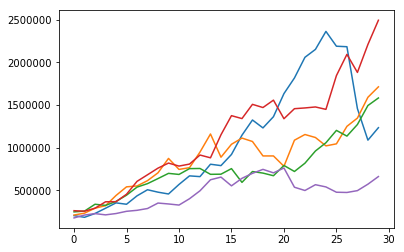

In [10]:
# 6. Plot first five simulated portfolios
plots.plot(simulated[first_five])


In [11]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(simulated.loc[29]))
print("Mean: ", (np.mean(simulated.loc[29])))
print("SD: ",(np.std(simulated.loc[29])))
print("Max: ",(np.max(simulated.loc[29])))
print("Min: ", (np.min(simulated.loc[29])))



Count: 5000
Mean:  2209937.2399119996
SD:  1489866.6613107948
Max:  14553937.02
Min:  235352.69


In [12]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = simulated.loc[29]
ending_values.describe()


count    5.000000e+03
mean     2.209937e+06
std      1.490016e+06
min      2.353527e+05
25%      1.211206e+06
50%      1.819154e+06
75%      2.783028e+06
max      1.455394e+07
Name: 29, dtype: float64

(array([  16.,   66.,  160.,  178.,  252.,  320.,  308.,  297.,  318.,
         302.,  269.,  264.,  247.,  171.,  183.,  170.,  132.,  127.,
         114.,  112.,  113.,   93.,   72.,   72.,   66.,   57.,   54.,
          50.,   34.,   45.,   35.,   38.,   16.,   24.,   18.,   12.,
          18.,   16.,    7.,   13.,   10.,   13.,   10.,    6.,   11.,
           9.,    5.,   10.,    4.,    5.,    3.,    3.,    6.,    4.,
           2.,    3.,    2.,    3.,    1.,    2.,    2.,    3.,    0.,
           2.,    1.,    2.,    3.,    1.,    2.,    0.,    1.,    1.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,
           1.,    0.,    1.,    0.,    0.,    2.,    1.,    0.,    1.,
           0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   235352.69  ,    378538.5333,    521724.3766,    664910.2199,
           808096.0632,    951281.9065,   1094467.7498,   1237653.5931,
          1380839.4364,   1524025.2797,   1667211.123 ,   1810396.

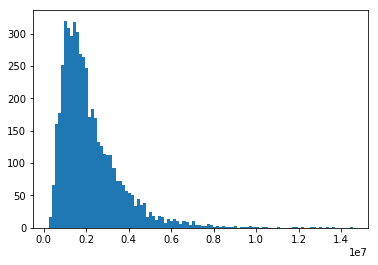

In [13]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)


In [ ]:
# 11. Calculate probability of seeing an ending value more  than savings

len(ending_values[ending_values>1020730])*100 / len(ending_values)


In [1]:
import os